<a href="https://colab.research.google.com/github/shaheeruzair/Python-Repository/blob/main/KMeans%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
cust = pd.read_csv("/nkECJQ.csv")
cust.head

,customerid,gender,age,income,spend_score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


Visualize Dimensions

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
cust[['normal_income','normal_spend']]= scaler.fit_transform(cust[['income','spend_score']])
cust.head()

,customerid,gender,age,income,spend_score,normal_income,normal_spend
0,1,Male,19,15000,39,0.000000,0.387755
1,2,Male,21,15000,81,0.000000,0.816327
2,3,Female,20,16000,6,0.008197,0.051020
3,4,Female,23,16000,77,0.008197,0.775510
4,5,Female,31,17000,40,0.016393,0.397959


K-Means WCSS

In [50]:
from sklearn.cluster import KMeans

In [54]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(cust[['normal_income','normal_spend']])
  wcss.append(kmeans.inertia_)

Elbow Method

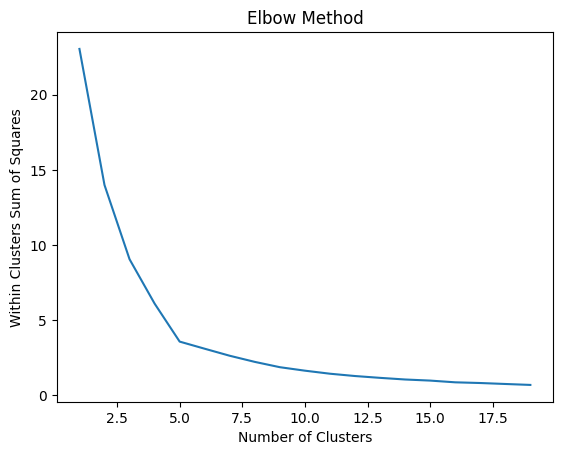

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

Apply K-Means

In [58]:
clusters = KMeans(n_clusters=5, n_init='auto')
cust['cluster'] = clusters.fit_predict(cust[['normal_income','normal_spend']])
cust.head(10)

,customerid,gender,age,income,spend_score,normal_income,normal_spend,label,cluster
0,1,Male,19,15000,39,0.000000,0.387755,4,2
1,2,Male,21,15000,81,0.000000,0.816327,2,4
2,3,Female,20,16000,6,0.008197,0.051020,4,2
3,4,Female,23,16000,77,0.008197,0.775510,2,4
4,5,Female,31,17000,40,0.016393,0.397959,4,2
5,6,Female,22,17000,76,0.016393,0.765306,2,4
6,7,Female,35,18000,6,0.024590,0.051020,4,2
7,8,Female,23,18000,94,0.024590,0.948980,2,4
8,9,Male,64,19000,3,0.032787,0.020408,4,2
9,10,Female,30,19000,72,0.032787,0.724490,2,4


Visualize Cluster

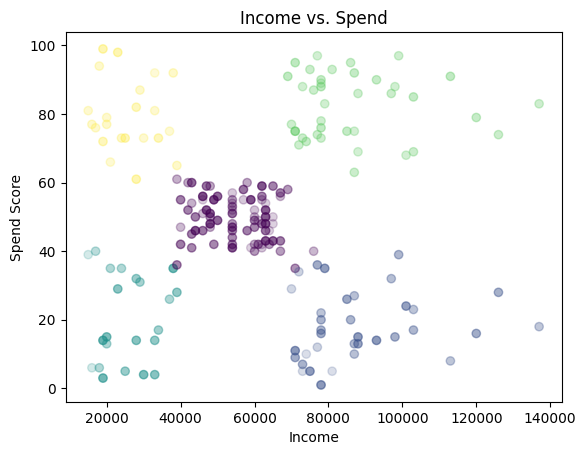

In [67]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Rename the variable 'plt' to avoid conflict
fig, ax = plt.subplots()

ax.scatter(x=cust['income'], y=cust['spend_score'], c=cust['cluster'], alpha=cust['age'] / 100)
ax.set_title('Income vs. Spend')
ax.set_xlabel('Income')
ax.set_ylabel('Spend Score')

plt.show()



Interpret Cluster

In [65]:
cust.groupby('cluster').aggregate({'customerid':'count','income':['min','max','mean'],'age':['min','max','mean'],'spend_score':['min','max','mean']})

customerid income                       age                 \
             count    min     max          mean min max       mean   
cluster                                                              
0               81  39000   76000  54888.888889  18  70  43.000000   
1               36  70000  137000  87750.000000  19  59  40.666667   
2               22  15000   39000  25727.272727  19  67  45.090909   
3               39  69000  137000  86538.461538  27  40  32.692308   
4               22  15000   39000  25727.272727  18  35  25.272727   

        spend_score                 
                min max       mean  
cluster                             
0                35  61  49.543210  
1                 1  39  17.583333  
2                 3  40  20.227273  
3                63  97  82.128205  
4                61  99  79.363636